In [1]:
import pandas as pd
import numpy as np
import requests
import json

## Gathring Data

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
open('image_predictions', 'wb').write(response.content)
predictions = pd.read_csv('image_predictions' , '\t')

In [4]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


In [5]:
tweets_interaction = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweets_interaction = tweets_interaction.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))
tweets_interaction = tweets_interaction.reset_index(drop=True)

## Assesing Data

#### For the each one of the three dataframes we will asses them first visually then get to know which column is missing values using .info and value counts, then see if there is any duplicated value

In [6]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
archive[archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [9]:
archive.name.value_counts().head(5)

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Name: name, dtype: int64

In [10]:
# assesing the denominator values
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
# assesing the numerator values
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
## viewing how many raitings have stages
print(archive.doggo.value_counts())
print(archive.floofer.value_counts())
print (archive.pupper.value_counts())
print(archive.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [13]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
predictions[predictions.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [16]:
predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [17]:
## checking if any values have all three false predictions
predictions.query("p1_dog == False & p2_dog == False & p3_dog == False" ).tweet_id.count()

324

In [18]:
tweets_interaction

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [19]:
tweets_interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [20]:
tweets_interaction[tweets_interaction.duplicated()]

,tweet_id,retweet_count,favorite_count


In [21]:
# checking the minumum and maximum values of retweets and faviorites
print(tweets_interaction.retweet_count.max(), tweets_interaction.retweet_count.min())
print(tweets_interaction.favorite_count.max(), tweets_interaction.favorite_count.min())

79515 0
132810 0


### Quality
#### archive table:

- Timestamp is a string and not date/time
- Tweet id is an int and not string
- Missing expanded urls for some values
- Entries that are retweets
- Entries that are replys
- Missing names for dogs (None)
- Wrong names for dogs (a)
- rating_denominator values not equal to 10

#### predictions table:

- Tweet id is an int and not string
- Entries have all false dog prediction

#### tweet table:

- retweet_count & favorite_count is a string not an int



### Tideness:

- All three tables should be merged in one table because they all represent one observaitonal unit referred to by the tweet id
- Creating one breed column in prediction table before joining with other tables
- Four columns in archive table needs only one column (doggo, floofer, pupper, puppo)

## Cleaning Data

1. Quality

In [22]:
# Making a copy of our data so we can compare it to original messy data
archive_clean = archive.copy()
predictions_clean = predictions.copy()
tweets_interaction_clean = tweets_interaction.copy()

### Define

Here we will combine five data qualty issues since they all fall under the same category:
- Changing incorrect data types (timestamp, tweet_id x 2, retweet_count, favorite_count)


### Code

In [23]:
archive_clean.timestamp = archive_clean.timestamp.astype('datetime64')
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)
tweets_interaction_clean.retweet_count = tweets_interaction_clean.retweet_count.astype(int)
tweets_interaction_clean.favorite_count = tweets_interaction_clean.favorite_count.astype(int)

### Test

In [24]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [25]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [26]:
tweets_interaction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int32
favorite_count    2354 non-null int32
dtypes: int32(2), object(1)
memory usage: 36.9+ KB


#### Entries that are retweets and replys

### Define

Two quality issues will be adressed here since they fall under the same cateogry:

- Omitting all rows that are retweets and replies (any row that have values in retweeted_status_id and in_reply_to_status_id

### Code

In [27]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]

In [28]:
## droping null columns after we used them
archive_clean = archive_clean.drop(columns=['retweeted_status_id', 'in_reply_to_status_id', "in_reply_to_user_id" ,'retweeted_status_user_id',
                           'retweeted_status_timestamp'])

### Test

all retweets and replies entires omitted and their columns dropped

In [29]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


#### Missing expanded urls for some value

### Define

- dropping three rows that don't have expanded URLs

### Code

In [30]:
archive_clean = archive_clean[archive_clean.expanded_urls.notnull()]

### Test

In [31]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 212.7+ KB


#### Entries that have all false dog prediction

### Define

- in the prediction table, we will elminate rows that don't have any correct dog prediction

### Code

In [32]:
index_names = predictions_clean.query("p1_dog == False & p2_dog == False & p3_dog == False").index

In [33]:
predictions_clean.drop(index_names, inplace = True)

### Test

In [34]:
predictions_clean.query("p1_dog == False & p2_dog == False & p3_dog == False").tweet_id.count()

0

### Quality Cleaning Notes

- The missing dog names and wrong dog names are ignored, since they are not necessary for analysis and we can't do anything to change it

- Because the raiting system is there for a laugh, the high denominator and numerator values are not wrong entries and will not be omitted. See below cell to understand.

In [35]:
archive_clean.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


2. Tideness 

Four columns in archive table needs only one column (doggo, floofer, pupper, puppo)


### Define

- Combining multiple dog stages column in one column using addition, after we replace none values with empty cells

### Code

In [36]:
# First we replace none values with empty cell
archive_clean.doggo.replace('None', "", inplace=True)
archive_clean.floofer.replace('None', "", inplace=True)
archive_clean.puppo.replace('None', "", inplace=True)
archive_clean.pupper.replace('None', "", inplace=True)
archive_clean['stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo


In [37]:
## And then we gather multiple dog stages.
archive_clean.loc[archive_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
archive_clean.loc[archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
archive_clean.loc[archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'
archive_clean.stage.replace('', 'None', inplace = True)

In [38]:
## Finally dropping original dog stages column
archive_clean.drop(['doggo', 'floofer', 'puppo','pupper'], axis=1, inplace = True)

### Test

In [39]:
archive_clean.stage.value_counts()

None             1759
pupper            220
doggo              72
puppo              23
doggo,pupper        9
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: stage, dtype: int64

In [40]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


#### Creating one breed column in prediction table before joining with other tables

### Define

- Using loc function condition, we will create one column called dog_breed based on the value of the prediction. Then we will create a new dataframe that contains only the tweet id and the dog_breed so we can merge it later with the archive table

### Code

In [41]:
predictions_clean.loc[predictions_clean.p1_dog == True, 'dog_breed'] = predictions_clean.p1
predictions_clean.loc[(predictions_clean.p2_dog == True) & (predictions_clean.p1_dog == False) , 'dog_breed'] = predictions_clean.p2
predictions_clean.loc[(predictions_clean.p3_dog == True) & (predictions_clean.p2_dog == False) & (predictions_clean.p1_dog == False), 'dog_breed'] = predictions_clean.p3

In [42]:
predictions_clean2 = predictions_clean[['tweet_id', 'dog_breed']].copy()

### Test

In [43]:
predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,golden_retriever


In [44]:
predictions_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 2 columns):
tweet_id     1751 non-null object
dog_breed    1751 non-null object
dtypes: object(2)
memory usage: 41.0+ KB


In [45]:
predictions_clean2.head()

,tweet_id,dog_breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


#### All three tables should be merged in one table because they all represent one observaitonal unit referred to by the tweet id

### Define

- We will use join function to merge all needed data in one table

### Code

In [46]:
## merging archive and predictions
archive_clean = pd.merge(archive_clean, predictions_clean2,
                            on='tweet_id', how='left')

In [47]:
## merging the new data frame with tweets_interaction
archive_clean = pd.merge(archive_clean, tweets_interaction_clean,
                            on='tweet_id', how='left')

### Test

In [48]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,Labrador_retriever,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,basset,9774,41048


In [49]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
stage                 2094 non-null object
dog_breed             1666 non-null object
retweet_count         2094 non-null int32
favorite_count        2094 non-null int32
dtypes: datetime64[ns](1), int32(2), int64(2), object(7)
memory usage: 196.3+ KB


In [50]:
archive_clean.dog_breed.value_counts()

golden_retriever                  156
Labrador_retriever                106
Pembroke                           94
Chihuahua                          90
pug                                62
toy_poodle                         50
chow                               48
Samoyed                            42
Pomeranian                         41
malamute                           33
French_bulldog                     31
Chesapeake_Bay_retriever           31
cocker_spaniel                     30
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Cardigan                           21
Staffordshire_bullterrier          20
beagle                             20
Siberian_husky                     20
Shih-Tzu                           20
Maltese_dog                        19
Rottweiler                         18
Shetland_sheepdog                  18
basset                             17
Italian_greyhound                  17
kuvasz      

In [51]:
archive_clean.to_csv('twitter_archive_master.csv', index= False)

## Analysis & Visualization

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,Labrador_retriever,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,basset,9774,41048


In [54]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2.094000e+03,2094.000000,2094.000000,2094.000000,2094.000000
mean,7.365113e+17,12.191500,10.449379,2844.039160,8987.330468
std,6.710561e+16,40.393858,6.649800,4712.115669,12207.002968
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000
25%,6.768137e+17,10.000000,10.000000,644.500000,2045.250000
50%,7.097095e+17,11.000000,10.000000,1404.000000,4195.500000
75%,7.876377e+17,12.000000,10.000000,3289.500000,11443.000000
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000


In [55]:
## showing the top 10 dog breeds in terms of total retwet count
top_breed_retweet = df.groupby('dog_breed')['retweet_count'].sum().nlargest(10)
top_breed_retweet

dog_breed
golden_retriever      586657
Labrador_retriever    405404
Pembroke              291771
Chihuahua             250722
Samoyed               203446
French_bulldog        156230
cocker_spaniel        145743
chow                  131025
pug                   118682
toy_poodle            115330
Name: retweet_count, dtype: int64

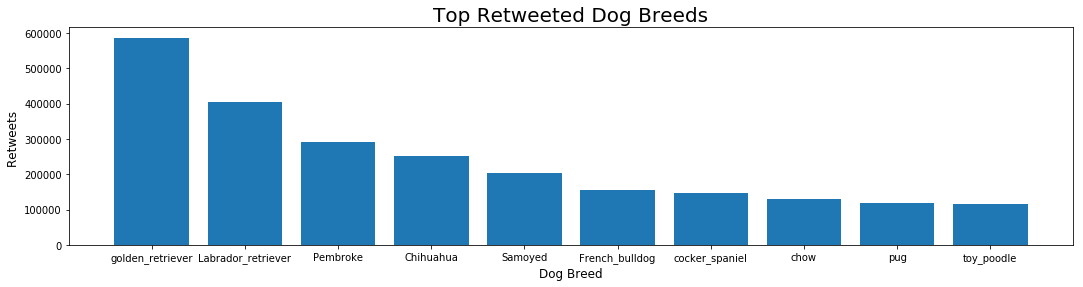

In [56]:
plt.figure(figsize=(18, 4))
plt.bar(top_breed_retweet.index, top_breed_retweet)
plt.title("Top Retweeted Dog Breeds",fontsize=20)
plt.xlabel("Dog Breed",fontsize=12)
plt.ylabel("Retweets ",fontsize=12);

In [57]:
## showing the top 10 dog breeds in terms of total Favorite count
top_breed_fav = df.groupby('dog_breed')['favorite_count'].sum().nlargest(10)
top_breed_fav

dog_breed
golden_retriever      1943782
Labrador_retriever    1265355
Pembroke              1038797
Chihuahua              743689
Samoyed                583906
French_bulldog         570921
chow                   446933
cocker_spaniel         407412
pug                    383817
toy_poodle             337270
Name: favorite_count, dtype: int64

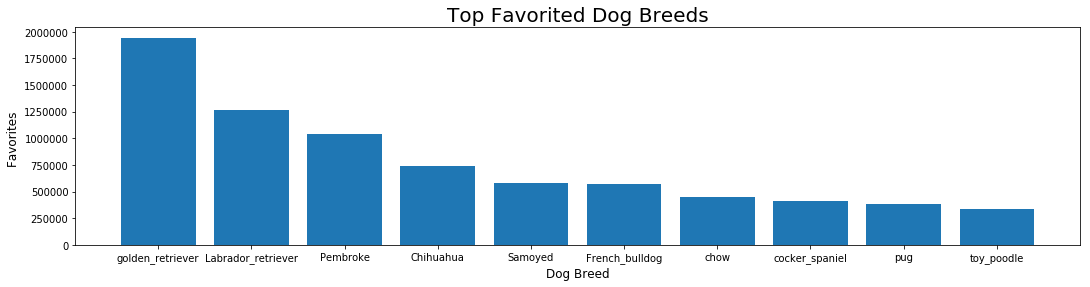

In [58]:
plt.figure(figsize=(18, 4))
plt.bar(top_breed_fav.index, top_breed_fav)
plt.title("Top Favorited Dog Breeds",fontsize=20)
plt.xlabel("Dog Breed",fontsize=12)
plt.ylabel("Favorites ",fontsize=12);

In [59]:
## showing the top dog stages in terms of total favorite count
top_stage_fav = df.groupby('stage')['favorite_count'].sum()
top_stage_fav

stage
None             15145587
doggo             1300334
doggo,floofer       17169
doggo,pupper       113732
doggo,puppo         47844
floofer             99580
pupper            1597905
puppo              497319
Name: favorite_count, dtype: int64

In [60]:
## Dropping the none column for visualization purposes
top_stage_fav.drop('None', inplace = True)

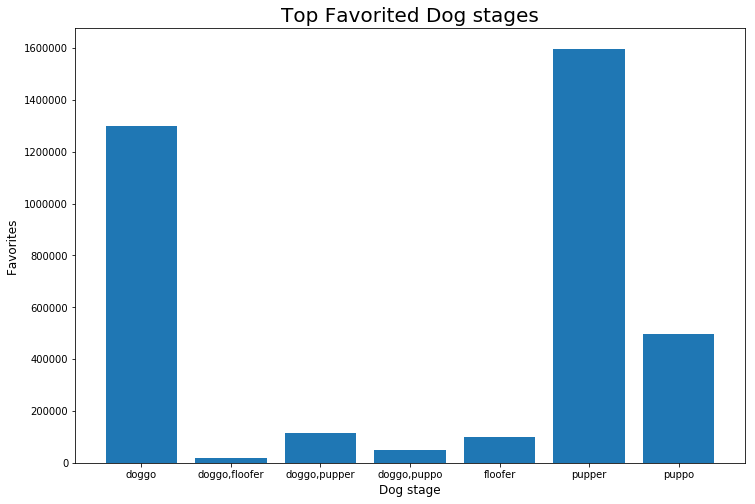

In [61]:
plt.figure(figsize=(12, 8))
plt.bar(top_stage_fav.index, top_stage_fav)
plt.title("Top Favorited Dog stages",fontsize=20)
plt.xlabel("Dog stage",fontsize=12)
plt.ylabel("Favorites ",fontsize=12);

In [62]:
## showing the top dog stages in terms of total retwet count
top_stage_retweet = df.groupby('stage')['retweet_count'].sum()
top_stage_retweet.drop('None', inplace = True)
top_stage_retweet

stage
doggo            475946
doggo,floofer      3433
doggo,pupper      38139
doggo,puppo       19196
floofer           37403
pupper           547540
puppo            151801
Name: retweet_count, dtype: int64

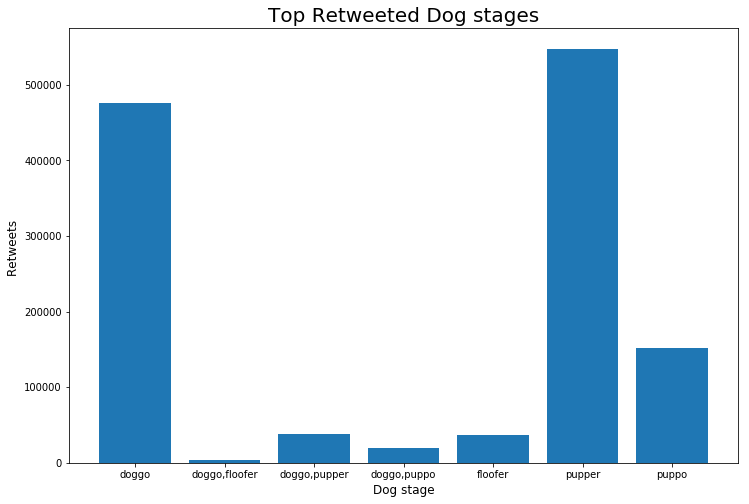

In [63]:
plt.figure(figsize=(12, 8))
plt.bar(top_stage_retweet.index, top_stage_retweet)
plt.title("Top Retweeted Dog stages",fontsize=20)
plt.xlabel("Dog stage",fontsize=12)
plt.ylabel("Retweets ",fontsize=12);